In [114]:
import jetnet
from jetnet.datasets import JetNet
import numpy as np
import matplotlib.pyplot as plt
import gen_metrics
from tqdm import tqdm
import pandas as pd
from IPython.display import Markdown, display
import pickle
import plotting
from typing import OrderedDict

plt.rcParams.update({"font.size": 16})


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os

plot_dir = "../plots/fgd_inf/Jan23"
_ = os.system(f"mkdir -p {plot_dir}")

data_dir = "../saved_data/"

In [162]:
gen_jets = np.load(f"{data_dir}/best_epoch_gen_jets.npy")
# gen_jets = np.concatenate([np.load(f"../../MPGAN/trained_models/mp_g/gen_jets{s}.npy") for s in ["", "_2", "_3"]], axis=0)
gen_efps = jetnet.utils.efps(gen_jets, efpset_args=[("d<=", 4)])
# gen_jets = np.concatenate([np.load(f"../../MPGAN/trained_models/mp_g/gen_jets{s}.npy") for s in ["_4", "_5"]], axis=0)
# gen_efps45 = jetnet.utils.efps(gen_jets, efpset_args=[("d<=", 4)])
real_efps = np.load(f"{data_dir}/t.npy")


In [126]:
real_efps = np.load(f"{data_dir}/g.npy")

In [117]:
gen_jets6 = np.load(f"../../MPGAN/trained_models/mp_g/gen_jets_6.npy")
gen_efps6 = jetnet.utils.efps(gen_jets6, efpset_args=[("d<=", 4)])

In [105]:
# real_jets, _ = JetNet.getData(
#     "g",
#     data_dir="/Users/raghav/Documents/CERN/gen-models/MPGAN/datasets/",
#     split_fraction=[1.0, 0.0, 0],
#     split="train",
#     particle_features=["etarel", "phirel", "ptrel"],
#     jet_features=None,
# )

# real_efps = jetnet.utils.efps(real_jets, efpset_args=[("d<=", 4)])
# np.save(f"{data_dir}/g_all.npy", real_efps)

In [121]:
real_efps_all = real_efps

In [24]:
gen_efps0 = gen_efps[:50000]
gen_efps1 = gen_efps[50000:100000]
gen_efps2 = gen_efps[100000:150000]

In [42]:
gen_efps3 = gen_efps45[:50000]
gen_efps4 = gen_efps45[50000:100000]

In [118]:
genefpss = [gen_efps0, gen_efps1, gen_efps2, gen_efps3, gen_efps4, gen_efps6]

In [103]:
fpd150k = gen_metrics.frechet_gaussian_distance(real_efps[-150000:], np.concatenate(genefpss[1:4], axis=0))

In [35]:
gen_efps1_rmoutliers = gen_efps1[gen_efps1[:, 24] < 0.0125]
gen_efps2_rmoutliers = gen_efps2[gen_efps2[:, 24] < 0.015]

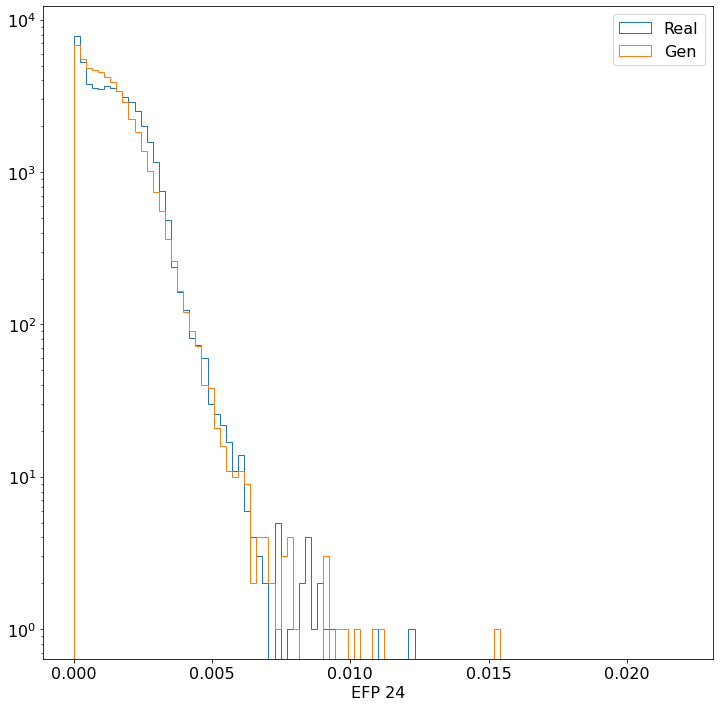

In [163]:
plt.figure(figsize=(12, 12))
_ = plt.hist(real_efps[:, 24], np.linspace(0, 0.022, 101), histtype='step', label="Real")
_ = plt.hist(gen_efps[:, 24], np.linspace(0, 0.022, 101), histtype='step', label="Gen")
# for i in range(1, 6):
#     _ = plt.hist(genefpss[i][:, 24], np.linspace(0, 0.022, 101), histtype='step', label=f"Gen {i}")
# _ = plt.hist(gen_efps0[:, 24], np.linspace(0, 0.022, 101), histtype='step', label="Gen")
# _ = plt.hist(gen_efps1_rmoutliers[:, 24], np.linspace(0, 0.03, 101), histtype='step', label="Gen 2")
# _ = plt.hist(gen_efps2_rmoutliers[:, 24], np.linspace(0, 0.03, 101), histtype='step', label="Gen 3")
# _ = plt.hist(gen_efps3_rmoutliers[:, 24], np.linspace(0, 0.03, 101), histtype='step', label="Gen 3")
# _ = plt.hist(gen_efps4_rmoutliers[:, 24], np.linspace(0, 0.03, 101), histtype='step', label="Gen 3")
plt.yscale('log')
plt.xlabel("EFP 24")
# plt.xscale('log')
# plt.ylabel(r"$\overline{\mathrm{FGD}}_{\infty}^{+\sigma}$")
_ = plt.legend()
plt.savefig(f"{plot_dir}/diffgenst.pdf")

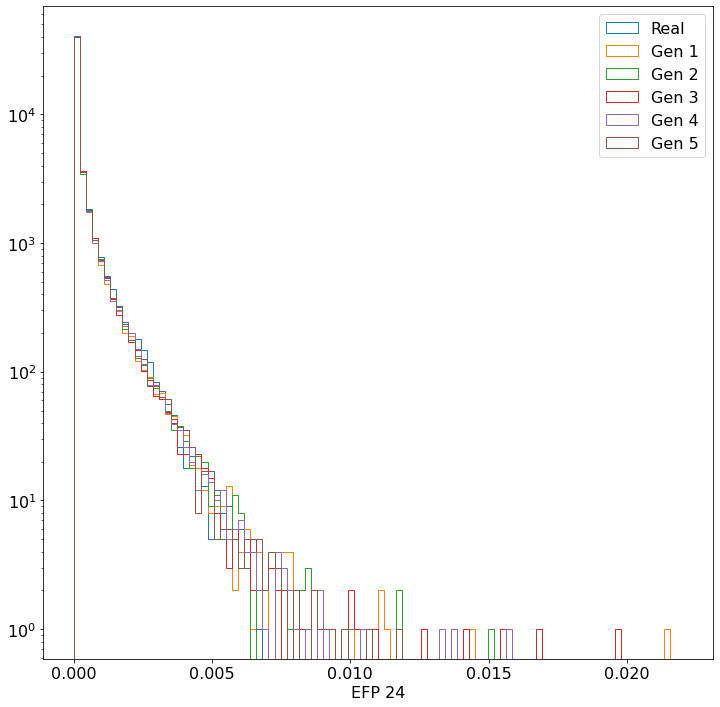

In [131]:
plt.figure(figsize=(12, 12))
_ = plt.hist(real_efps[:, 24], np.linspace(0, 0.022, 101), histtype='step', label="Real")
for i in range(1, 6):
    _ = plt.hist(genefpss[i][:, 24], np.linspace(0, 0.022, 101), histtype='step', label=f"Gen {i}")
# _ = plt.hist(gen_efps0[:, 24], np.linspace(0, 0.022, 101), histtype='step', label="Gen")
# _ = plt.hist(gen_efps1_rmoutliers[:, 24], np.linspace(0, 0.03, 101), histtype='step', label="Gen 2")
# _ = plt.hist(gen_efps2_rmoutliers[:, 24], np.linspace(0, 0.03, 101), histtype='step', label="Gen 3")
# _ = plt.hist(gen_efps3_rmoutliers[:, 24], np.linspace(0, 0.03, 101), histtype='step', label="Gen 3")
# _ = plt.hist(gen_efps4_rmoutliers[:, 24], np.linspace(0, 0.03, 101), histtype='step', label="Gen 3")
plt.yscale('log')
plt.xlabel("EFP 24")
# plt.xscale('log')
# plt.ylabel(r"$\overline{\mathrm{FGD}}_{\infty}^{+\sigma}$")
_ = plt.legend()
plt.savefig(f"{plot_dir}/diffgensg.pdf")

In [16]:
res0 = gen_metrics.one_over_n_extrapolation_repeated_measurements(real_efps, gen_efps0, seed=42)

In [18]:
res1 = gen_metrics.one_over_n_extrapolation_repeated_measurements(real_efps, gen_efps1, seed=42)

In [38]:
res2 = gen_metrics.one_over_n_extrapolation_repeated_measurements(real_efps, gen_efps2, seed=42)
res2_rmoutliers = gen_metrics.one_over_n_extrapolation_repeated_measurements(real_efps, gen_efps2_rmoutliers, seed=42)

In [47]:
res3 = gen_metrics.one_over_n_extrapolation_repeated_measurements(real_efps, gen_efps3, seed=42)
res4 = gen_metrics.one_over_n_extrapolation_repeated_measurements(real_efps, gen_efps4, seed=42)

In [127]:
res6 = gen_metrics.one_over_n_extrapolation_repeated_measurements(real_efps, gen_efps6, seed=42)

In [128]:
ress = [res0, res1, res2, res3, res4, res6]

In [68]:
mmds = []
for i in range(5):
    mmds.append(gen_metrics.multi_batch_evaluation_mmd(real_efps, genefpss[i], seed=42))

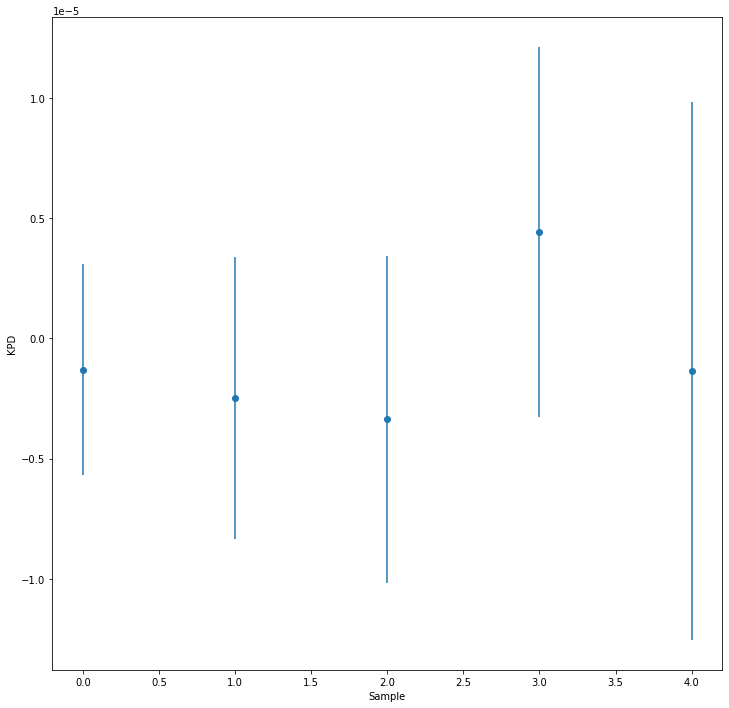

In [70]:
mmds = np.array(mmds)
plt.figure(figsize=(12, 12))
plt.errorbar(range(5), mmds[:, 0], mmds[:, 1], fmt="o")
plt.ylabel(r"KPD")
plt.xlabel("Sample")
plt.savefig(f"{plot_dir}/diffgensg_kpd.pdf")

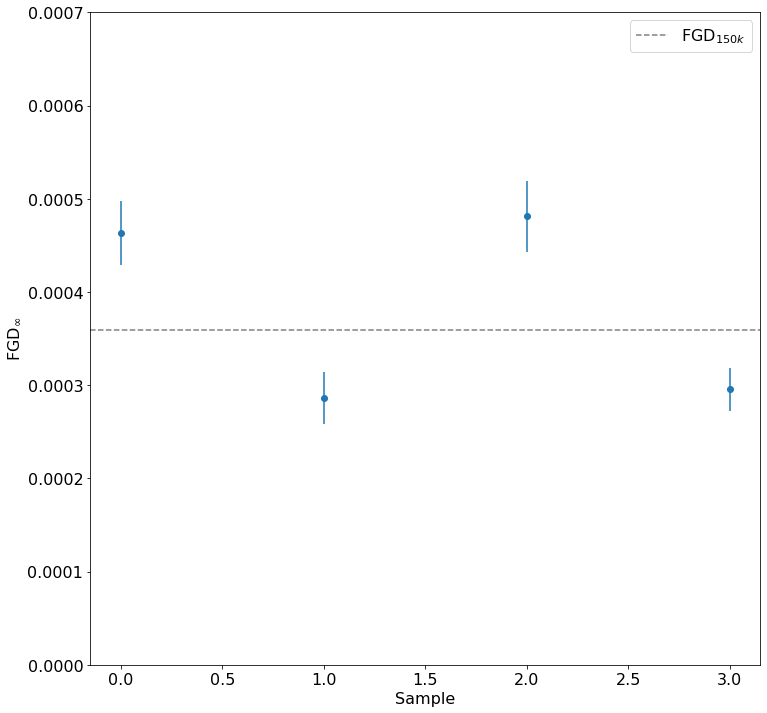

In [150]:
resgs = np.vstack([res1[:2], res2[:2], res3[:2], res4[:2]])
plt.figure(figsize=(12, 12))
plt.axhline(y=fpd150k, color = 'gray', linestyle = '--', label=r"FGD$_{150k}$")
plt.errorbar(range(4), resgs[:, 0], resgs[:, 1], fmt="o")
plt.ylabel(r"FGD$_\infty$")
plt.xlabel("Sample")
plt.ylim([0, 0.0007])
plt.legend()
plt.savefig(f"{plot_dir}/diffgensg_fpd.pdf")

100%|██████████| 4/4 [00:24<00:00,  6.09s/it]


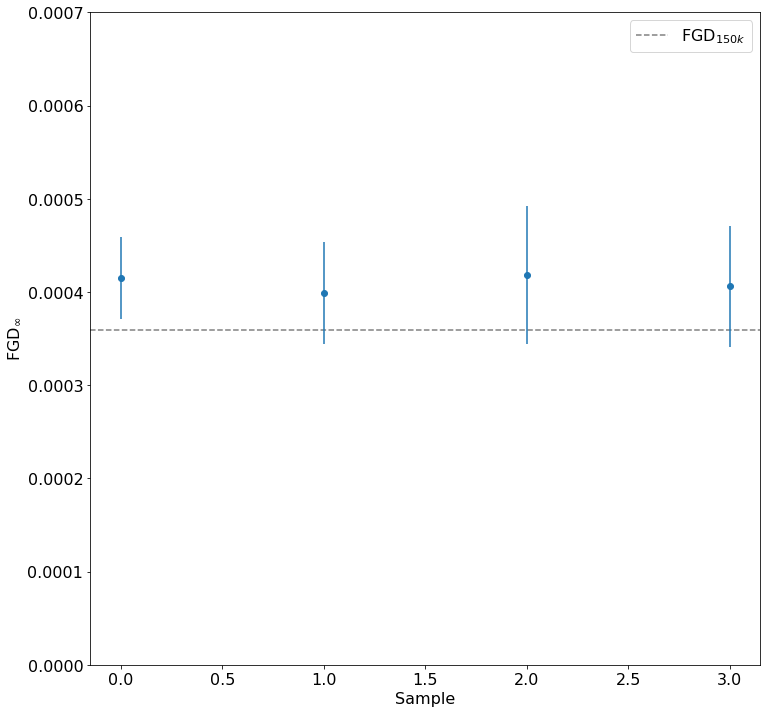

In [159]:
numb = 10
nump = 10
min_samples = 20_000
ii = True

resnew = []
for i in tqdm(range(1, 5)):
    resnew.append(gen_metrics.one_over_n_extrapolation_repeated_measurements(real_efps, gen_efps2, min_samples=min_samples, max_samples=50_000, num_batches=numb, num_points=nump, seed=i, inverse_intervals=ii))

resnewgs = np.vstack([resn[:2] for resn in resnew])
plt.figure(figsize=(12, 12))
plt.axhline(y=fpd150k, color = 'gray', linestyle = '--', label=r"FGD$_{150k}$")
plt.errorbar(range(4), resnewgs[:, 0], resnewgs[:, 1], fmt="o")
plt.ylabel(r"FGD$_\infty$")
plt.xlabel("Sample")
plt.ylim([0, 0.0007])
plt.legend()
plt.savefig(f"{plot_dir}/diffgensg_fpd_b{numb}_p{nump}_mins{min_samples}_vb_{'ii' if ii else 'ni'}.pdf")

/var/folders/fh/cwyrvktn5bz76x4cpy_lbgnh0000gn/T/ipykernel_10959/3544105876.py:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(np.linspace(0, 50_000, 101), ress[i][0] + ress[i][4] * (1 / np.linspace(0, 50_000, 101)), color=colors[i], label=f"Sample {i+1}")


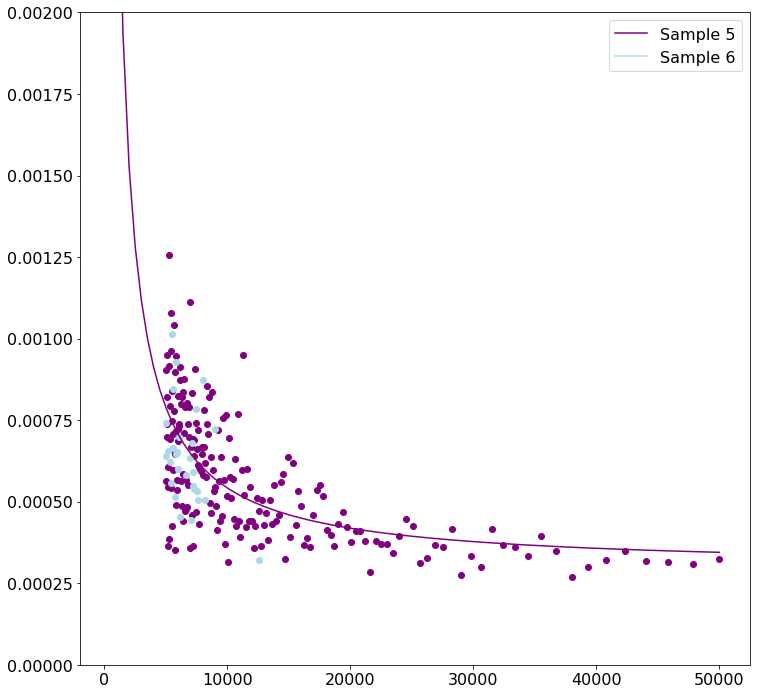

In [133]:
plt.figure(figsize=(12, 12))

colors = ["red", "green", "blue", "orange", "purple", "lightblue"]

for i in range(4, 6):
    plt.scatter(ress[i][2], ress[i][3], color=colors[i])
    plt.plot(np.linspace(0, 50_000, 101), ress[i][0] + ress[i][4] * (1 / np.linspace(0, 50_000, 101)), color=colors[i], label=f"Sample {i+1}")
    plt.ylim([0, 0.002])

plt.legend()

/var/folders/fh/cwyrvktn5bz76x4cpy_lbgnh0000gn/T/ipykernel_10959/297980067.py:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(np.linspace(0, 50_000, 101), resnew[i][0] + resnew[i][4] * (1 / np.linspace(0, 50_000, 101)), color=colors[i], label=f"Sample {i+1}")


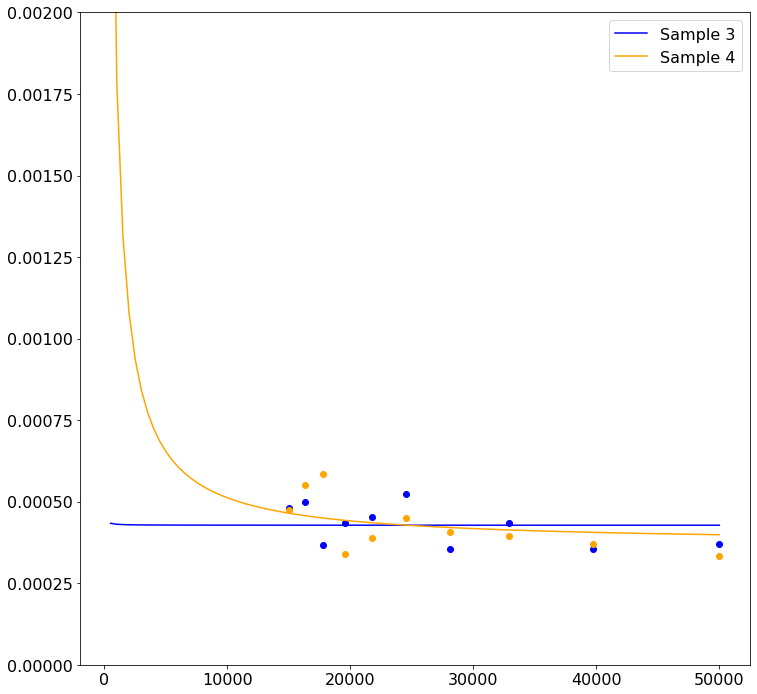

In [158]:
plt.figure(figsize=(12, 12))

colors = ["red", "green", "blue", "orange", "purple", "lightblue"]

for i in range(2, 4):
    plt.scatter(resnew[i][2], resnew[i][3], color=colors[i])
    plt.plot(np.linspace(0, 50_000, 101), resnew[i][0] + resnew[i][4] * (1 / np.linspace(0, 50_000, 101)), color=colors[i], label=f"Sample {i+1}")
    plt.ylim([0, 0.002])

plt.legend()

In [ ]:
plt.figure(figsize=(12, 12))
plt.errorbar(0, res[0], res[1], fmt="o")
plt.scatter(1 / res[2], res[3])
plt.plot(1 / np.linspace(5000, 1e8, 101), res[0] + res[4] * (1 / np.linspace(5000, 1e8, 101)), color="red")
# plt.legend()

In [7]:
from scipy.optimize import curve_fit
from scipy.stats import linregress

def linear(x, intercept, slope):
    return intercept + slope * x

100%|██████████| 10/10 [00:58<00:00,  5.89s/it]


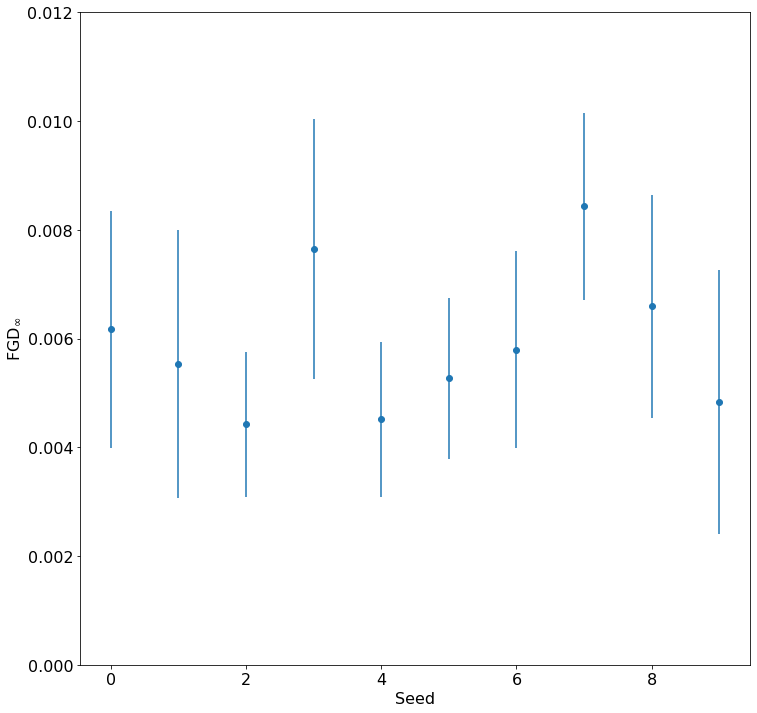

In [167]:
numb = 30
nump = 10
min_samples = 20_000
ii = True

means_ses = []
for i in tqdm(range(10)):
    res = gen_metrics.one_over_n_extrapolation_repeated_measurements(real_efps, gen_efps, min_samples=min_samples, max_samples=50_000, num_batches=numb, num_points=nump, seed=i, inverse_intervals=ii)
    means_ses.append([res[0], res[1]])

means_ses = np.array(means_ses)
plt.figure(figsize=(12, 12))
plt.errorbar(range(10), means_ses[:, 0], means_ses[:, 1], fmt="o")
# plt.axhline(y=fpd150k, color = 'gray', linestyle = '--', label=r"FGD$_{150k}$")
plt.ylim([0, 0.012])
plt.ylabel(r"FGD$_\infty$")
plt.xlabel("Seed")
plt.savefig(f"{plot_dir}/t_fgdinf_check_b{numb}_p{nump}_mins{min_samples}_vb_{'ii' if ii else 'ni'}.pdf")

100%|██████████| 4/4 [00:16<00:00,  4.09s/it]


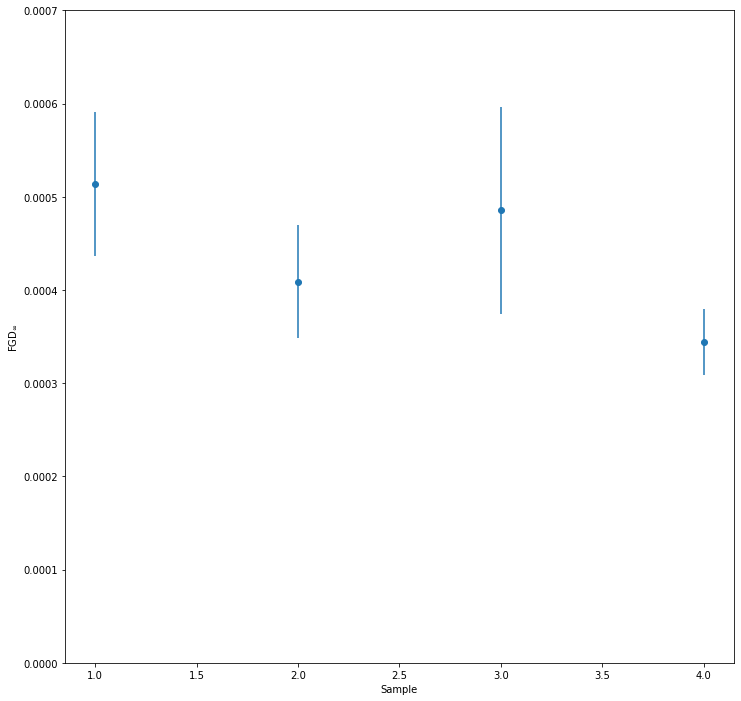

In [89]:
numb = 20
nump = 10
min_samples = 20_000
ii = True

means_ses = []
for i in tqdm(range(1, 5)):
    res = gen_metrics.one_over_n_extrapolation_repeated_measurements(real_efps, genefpss[i], min_samples=min_samples, max_samples=50_000, num_batches=numb, num_points=nump, seed=42, inverse_intervals=ii)
    means_ses.append([res[0], res[1]])

means_ses = np.array(means_ses)
plt.figure(figsize=(12, 12))
plt.errorbar(range(1, 5), means_ses[:, 0], means_ses[:, 1], fmt="o")
plt.ylim([0, 0.0007])
plt.ylabel(r"FGD$_\infty$")
plt.xlabel("Sample")
plt.savefig(f"{plot_dir}/gdiffsamples_fgdinf_check_b{numb}_p{nump}_mins{min_samples}_vb_{'ii' if ii else 'ni'}.pdf")

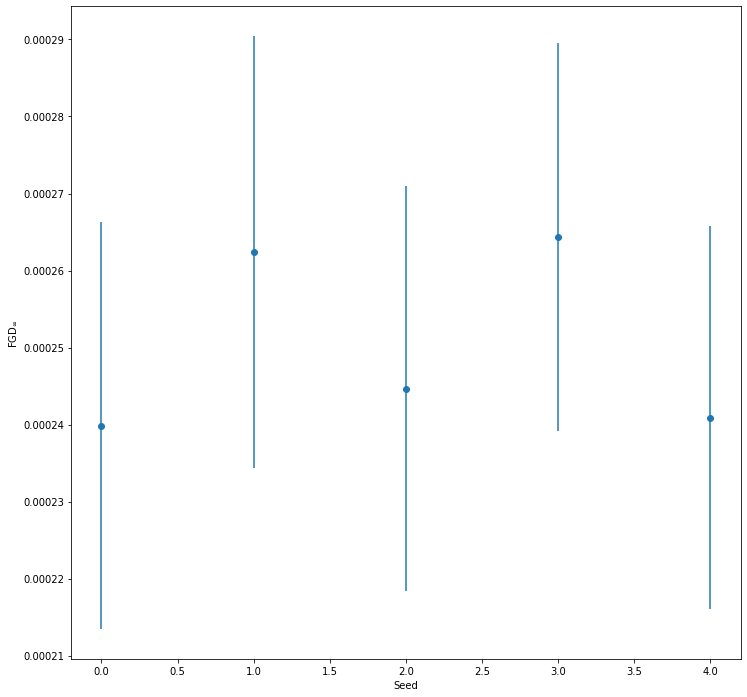

In [33]:
numb = 10
nump = 200

means_ses = []
for i in tqdm(range(5)):
    res = gen_metrics.one_over_n_extrapolation_repeated_measurements(real_efps, gen_efps2_rmoutliers, min_samples=5000, max_samples=50_000, num_batches=numb, num_points=nump, seed=i)
    means_ses.append([res[0], res[1]])

means_ses = np.array(means_ses)
plt.figure(figsize=(12, 12))
plt.errorbar(range(5), means_ses[:, 0], means_ses[:, 1], fmt="o")
plt.ylabel(r"FGD$_\infty$")
plt.xlabel("Seed")
plt.savefig(f"{plot_dir}/g_fgdinf_check_b{numb}_p{nump}_vb_nooutliers.pdf")

In [ ]:
numb = 10
nump = 200

res = gen_metrics.one_over_n_extrapolation_repeated_measurements(real_efps, gen_efps, min_samples=5000, max_samples=50_000, num_batches=numb, num_points=nump, seed=0)

/var/folders/fh/cwyrvktn5bz76x4cpy_lbgnh0000gn/T/ipykernel_10959/1928601753.py:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(np.linspace(0, 50_000, 101), res[0] + res[4] * (1 / np.linspace(0, 50_000, 101)), color="red")


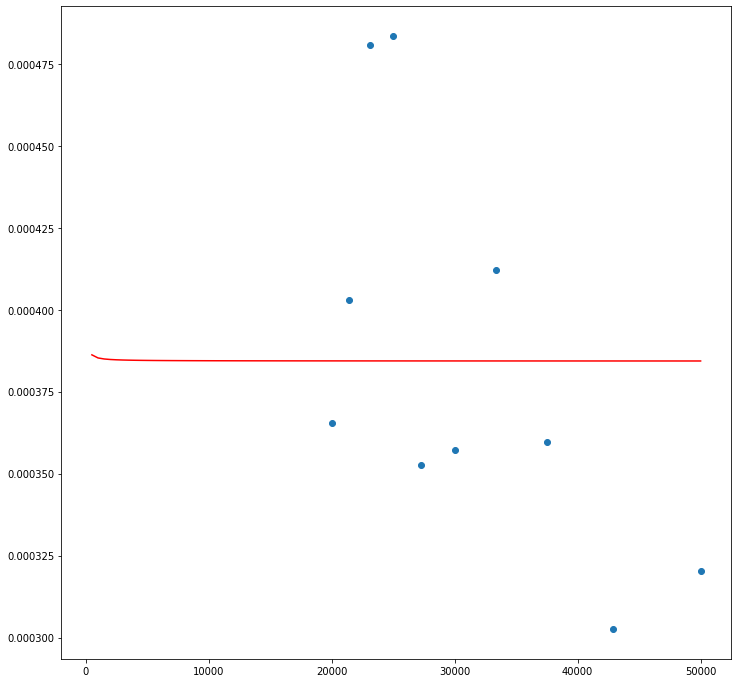

In [91]:
plt.figure(figsize=(12, 12))
# plt.errorbar(0, res[0], res[1], fmt="o")
plt.scatter(res[2], res[3])
plt.plot(np.linspace(0, 50_000, 101), res[0] + res[4] * (1 / np.linspace(0, 50_000, 101)), color="red")
# plt.legend()

In [93]:
res[4]

0.0009454524424618123

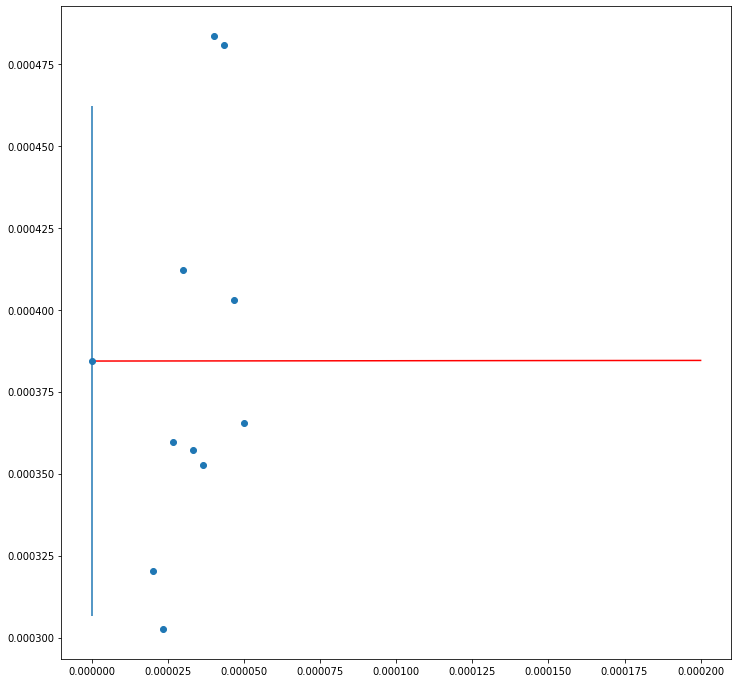

In [92]:
plt.figure(figsize=(12, 12))
plt.errorbar(0, res[0], res[1], fmt="o")
plt.scatter(1 / res[2], res[3])
plt.plot(1 / np.linspace(5000, 1e8, 101), res[0] + res[4] * (1 / np.linspace(5000, 1e8, 101)), color="red")
# plt.legend()

In [ ]:
means_ses = np.array(means_ses)
plt.figure(figsize=(12, 12))
plt.errorbar(range(10), means_ses[:, 0], means_ses[:, 1], fmt="o")
plt.ylabel(r"FGD$_\infty$")
plt.xlabel("Seed")
plt.savefig(f"{plot_dir}/fgdinf_check_b{numb}_p{nump}_vb.pdf")

In [ ]:
res = gen_metrics.one_over_n_extrapolation(real_efps, gen_efps, gen_metrics.frechet_gaussian_distance, min_samples=5_000, max_samples=25_000, num_batches=1, num_points=101, seed=1)
res

In [ ]:
plt.figure(figsize=(12, 12))
plt.errorbar(res[2], res[3][:, 0], res[3][:, 1], fmt="o")
plt.plot(np.linspace(0, 50_000, 101), res[0][0] + res[0][1] * (1 / np.linspace(0, 50_000, 101)), color="red")
# plt.legend()

In [ ]:
plt.figure(figsize=(12, 12))
# plt.errorbar(1 / res[0], res[1][:, 0], res[1][:, 1], fmt="o")
plt.scatter(1 / res[2], res[3][:, 0])
plt.plot(np.linspace(0, 0.0002, 101), res[0][0] + res[0][1] * np.linspace(0, 0.0002, 101), label="Full Fit", color="red")
plt.errorbar(0, res[0][0], res[1][0], fmt="o", color="red")
plt.title("Without errors on measurements")
plt.savefig(f"{plot_dir}/fgdinf_fit_b{numb}_p{nump}.pdf")
# plt.legend()

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(res[2], res[3])
# plt.plot(np.linspace(0, 0.0002, 101), res[0] + res[4] * np.linspace(0, 0.0002, 101), label="Full Fit", color="red")
# plt.plot(np.linspace(0, 0.0002, 101), val[0] + val[1] * np.linspace(0, 0.0002, 101), label="Averaged Fit", color="green")
# plt.errorbar(1 / np.mean(res[2][:-1].reshape(-1, 10), axis=1), np.mean(res[3][:-1].reshape(-1, 10), axis=1), np.std(res[3][:-1].reshape(-1, 10), axis=1), fmt="o", color="green")
# plt.errorbar(0, res[0], res[1], fmt="o", color="red")
# plt.errorbar(-0.000001, val[0], np.sqrt(np.diag(cov))[0], fmt="o", color="green")
plt.xlabel("N")
plt.ylabel("FGD")
plt.legend()

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(1 / res[2], res[3])
plt.plot(np.linspace(0, 0.0002, 101), res[0] + res[4] * np.linspace(0, 0.0002, 101), label="Full Fit", color="red")
# plt.plot(np.linspace(0, 0.0002, 101), val[0] + val[1] * np.linspace(0, 0.0002, 101), label="Averaged Fit", color="green")
# plt.errorbar(1 / np.mean(res[2][:-1].reshape(-1, 10), axis=1), np.mean(res[3][:-1].reshape(-1, 10), axis=1), np.std(res[3][:-1].reshape(-1, 10), axis=1), fmt="o", color="green")
plt.errorbar(0, res[0], res[1], fmt="o", color="red")
# plt.errorbar(-0.000001, val[0], np.sqrt(np.diag(cov))[0], fmt="o", color="green")
plt.xlabel("N")
plt.ylabel("FGD")
plt.legend()

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(1 / res[2], res[3])
# plt.plot(np.linspace(0, 0.0002, 101), res[0] + res[4] * np.linspace(0, 0.0002, 101), label="Full Fit", color="red")
# plt.plot(np.linspace(0, 0.0002, 101), val[0] + val[1] * np.linspace(0, 0.0002, 101), label="Averaged Fit", color="green")
# plt.errorbar(1 / np.mean(res[2][:-1].reshape(-1, 10), axis=1), np.mean(res[3][:-1].reshape(-1, 10), axis=1), np.std(res[3][:-1].reshape(-1, 10), axis=1), fmt="o", color="green")
# plt.errorbar(0, res[0], res[1], fmt="o", color="red")
# plt.errorbar(-0.000001, val[0], np.sqrt(np.diag(cov))[0], fmt="o", color="green")
plt.legend()

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(1 / res[2], res[3])
plt.plot(np.linspace(0, 0.0002, 101), res[0] + res[4] * np.linspace(0, 0.0002, 101), label="Full Fit", color="red")
plt.plot(np.linspace(0, 0.0002, 101), val[0] + val[1] * np.linspace(0, 0.0002, 101), label="Averaged Fit", color="green")
plt.errorbar(1 / np.mean(res[2][:-1].reshape(-1, 10), axis=1), np.mean(res[3][:-1].reshape(-1, 10), axis=1), np.std(res[3][:-1].reshape(-1, 10), axis=1), fmt="o", color="green")
plt.errorbar(0, res[0], res[1], fmt="o", color="red")
plt.errorbar(-0.000001, val[0], np.sqrt(np.diag(cov))[0], fmt="o", color="green")
plt.legend()

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(res[2], res[3])
plt.plot(np.linspace(0, 50_000, 101), res[0] + res[4] * (1 / np.linspace(0, 50_000, 101)))

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(np.mean(res[2][:-1].reshape(-1, 10), axis=1), np.mean(res[3][:-1].reshape(-1, 10), axis=1))

In [ ]:
plt.figure(figsize=(12, 12))
plt.errorbar(1 / np.mean(res[2][:-1].reshape(-1, 10), axis=1), np.mean(res[3][:-1].reshape(-1, 10), axis=1), np.std(res[3][:-1].reshape(-1, 10), axis=1), fmt="o")

In [ ]:
ms = []
for batch_size in tqdm(batch_sizes["fgd"][9:]):
    mean_std, timing = gen_metrics.multi_batch_evaluation(
        real_efps,
        gen_efps,
        5,
        batch_size,
        gen_metrics.frechet_gaussian_distance,
        timing=True,
        normalise=True
    )
    ms.append(mean_std)